In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
#import data from csv
city_csv = "city_data.csv"
ride_csv = "ride_data.csv"
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [43]:
#view data frames
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [44]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [45]:
pyber_summary = pd.merge(city_df, ride_df, on="city", how="left")
pyber_summary.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [46]:
#find values for average fare and number of rides
bubble_plot_df_1 = pyber_summary.groupby(["type", "city"],as_index=True).mean()["fare"].to_frame().reset_index()
bubble_plot_df_2 = pyber_summary.groupby(["type", "city"],as_index=True).count()["ride_id"].to_frame().reset_index()
bubble_plot_df = pd.merge(bubble_plot_df_1, bubble_plot_df_2,
                         on=["type", "city"])
bubble_plot_df.head()

,type,city,fare,ride_id
0,Rural,East Leslie,33.660909,11
1,Rural,East Stephen,39.053000,10
2,Rural,East Troybury,33.244286,7
3,Rural,Erikport,30.043750,8
4,Rural,Hernandezshire,32.002222,9


In [53]:
#set size of bubbles
size = 5*city_df.groupby(["type", "city"], as_index=True).sum()["driver_count"]

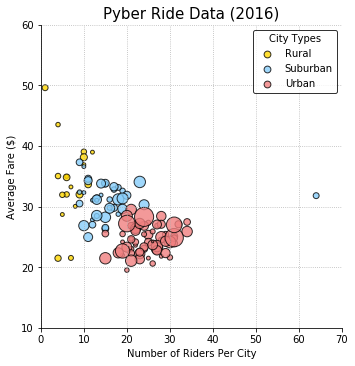

In [54]:
#create scatter plot
sns.lmplot(x="ride_id", y="fare", data=bubble_plot_df,
          fit_reg=False, hue="type", legend_out=False,
          size=5,scatter_kws={"s": size, 'linewidths':1, 'edgecolor':'black'},
          palette=dict(Rural="gold", Suburban="lightskyblue", Urban="lightcoral"))
plt.legend(title="City Types", loc="best", markerscale=0.5, edgecolor="black")
plt.grid(linestyle="dotted")
plt.xlim(0,70)
plt.ylim(10,60)
plt.title("Pyber Ride Data (2016)", fontsize=15)
plt.xlabel("Number of Riders Per City")
plt.ylabel("Average Fare ($)")

plt.show()

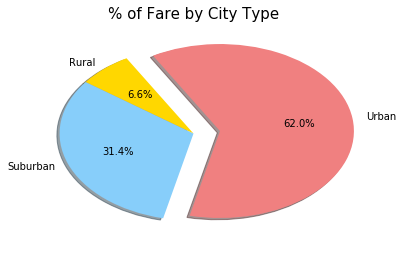

In [57]:
#total fares by city type
labels = ["Rural", "Suburban", "Urban"]
sizes = pyber_summary.groupby(["type"], as_index=False).sum()["fare"].tolist()
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("off")
plt.title("% of Fare by City Type", fontsize=15)
plt.show()

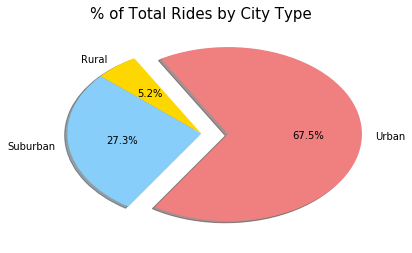

In [58]:
#total rides by city
labels = ["Rural", "Suburban", "Urban"]
sizes = pyber_summary.groupby(["type"], as_index=False).count()["ride_id"].tolist()
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("off")
plt.title("% of Total Rides by City Type", fontsize=15)
plt.show()

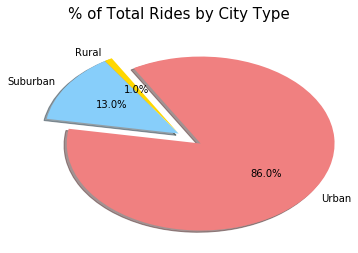

In [59]:
#total drivers by city type
labels = ["Rural", "Suburban", "Urban"]
sizes = pyber_summary.groupby(["type"], as_index=False).sum()["driver_count"].tolist()
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("off")
plt.title("% of Total Rides by City Type", fontsize=15)
plt.show()